In [1]:
import sys
if not '../..' in sys.path:
    sys.path.append('../..')
    sys.path.append('..')
from analysis import collection, analysis, emg, plot, model
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches, lines
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from joblib import dump, load
from analysis.offsets import offsets

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'axes.labelsize': 16})
mpl.rcParams.update({'figure.figsize': (16*0.8,9*0.8)})
mpl.rcParams.update({'axes.facecolor': "white"})
mpl.rcParams.update({'lines.marker': "+"})
mpl.rcParams.update({'lines.linestyle': ""})
mpl.rcParams.update({"axes.spines.left":   True})
mpl.rcParams.update({"axes.spines.bottom": True})
mpl.rcParams.update({"axes.spines.top":    False})
mpl.rcParams.update({"axes.spines.right":  False})

image_path = Path("/Users/spencer/phd/phd/images/more_results/gmms/")

%matplotlib inline

In [2]:
subjects = analysis.load_subjects()

In [4]:
import pandas as pd
trajectory_df = pd.read_pickle("../trajectory_dataframe.pkl")
mean_rewards = 1 / trajectory_df.groupby(level=['subject']).mean()["reward"]

## W2(calibration/movement - trial model 0) vs reward

In [26]:
calibration_trial_distances = []
for subject_idx in range(len(subjects)):
    trial_model = model.load_log_trial_models(subject_idx)[0]
    calibration_model = model.load_log_calibration_models(subject_idx)[0]
    calibration_trial_distances.append(model.gmm_wasserstein(trial_model.weights_,calibration_model.weights_,trial_model.means_,calibration_model.means_,trial_model.covariances_,calibration_model.covariances_))

/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator BayesianGaussianMixture from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [28]:
movement_trial_distances = []
for subject_idx in range(len(subjects)):
    trial_model = model.load_log_trial_models(subject_idx)[0]
    movement_model = model.load_log_movement_models(subject_idx)[0]
    movement_trial_distances.append(model.gmm_wasseddrstein(trial_model.weights_,movement_model.weights_,trial_model.means_,movement_model.means_,trial_model.covariances_,movement_model.covariances_))

/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator BayesianGaussianMixture from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


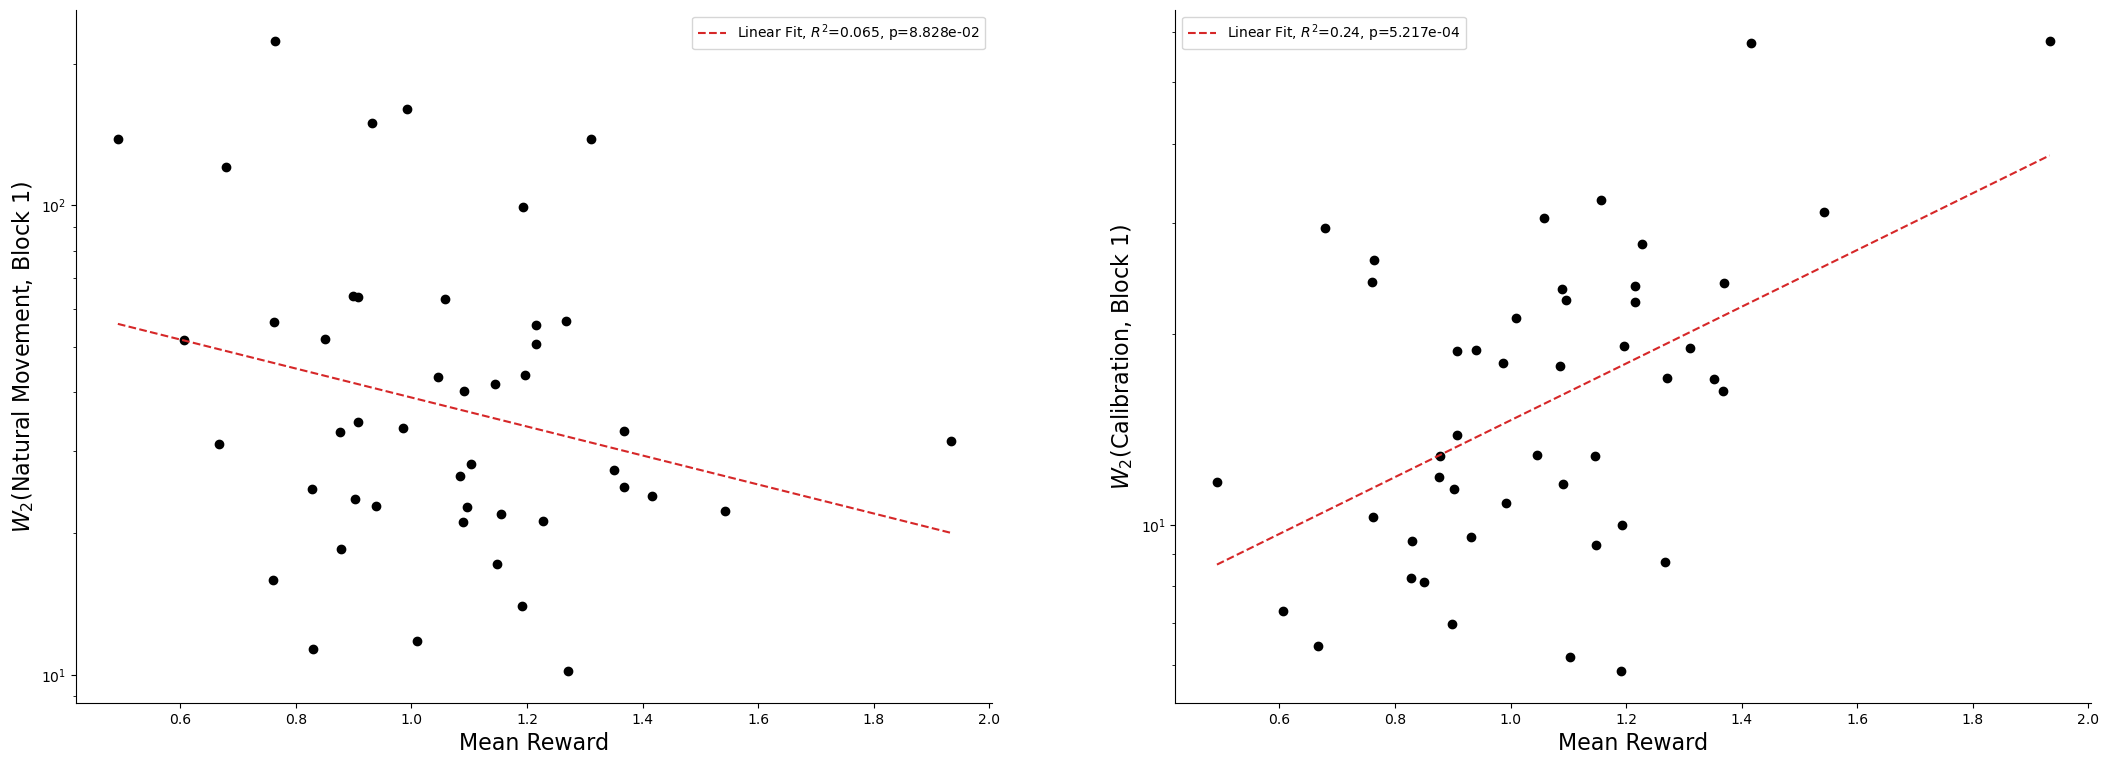

In [41]:
w2_fig, axes = plt.subplots(1,2,figsize=(26,9))

axes[0].semilogy(mean_rewards,movement_trial_distances,"ko")
r = analysis.linear_fit(mean_rewards,np.log10(movement_trial_distances))
x = np.linspace(np.min(mean_rewards),np.max(mean_rewards),100)
axes[0].plot(x, 10**(r.intercept + r.slope*x),"--", color="tab:red", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")
axes[0].set_ylabel("${W}_2$(Natural Movement, Block 1)")
axes[0].set_xlabel("Mean Reward")
axes[0].legend()

axes[1].semilogy(mean_rewards,calibration_trial_distances,"ko")
r = analysis.linear_fit(mean_rewards,np.log10(calibration_trial_distances))
x = np.linspace(np.min(mean_rewards),np.max(mean_rewards),100)
axes[1].plot(x, 10**(r.intercept + r.slope*x),"--", color="tab:red", label=f"Linear Fit, $R^2$={plot.format_positional(r.rvalue**2)}, p={plot.format_scientific(r.pvalue)}")
axes[1].set_ylabel("${W}_2$(Calibration, Block 1)")
axes[1].set_xlabel("Mean Reward")
axes[1].legend()

In [42]:
plot.save_figure(w2_fig, "gmm_wasserstein", image_path)

Figure saved to /Users/spencer/phd/phd/images/more_results/gmms/gmm_wasserstein.pdf
